In [205]:
# Import all libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [174]:
# Read in dataframe
df = pd.read_csv('fbdh1.csv')

In [175]:
# df.head()

In [176]:
# Use a label fix function to assign classifications or ground truth to Flow thresholds
def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

In [177]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21,0
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91,0
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26,0
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37,0
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68,0


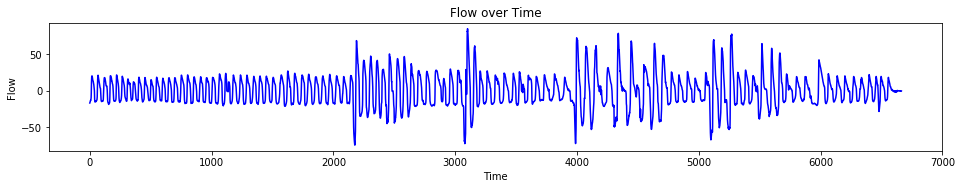

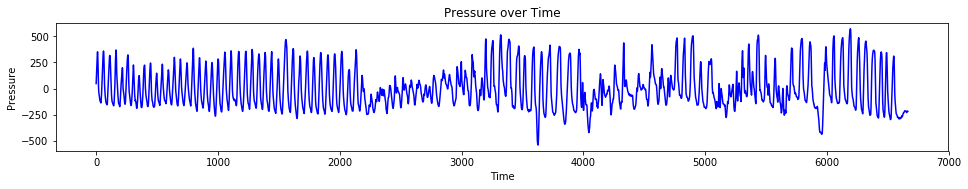

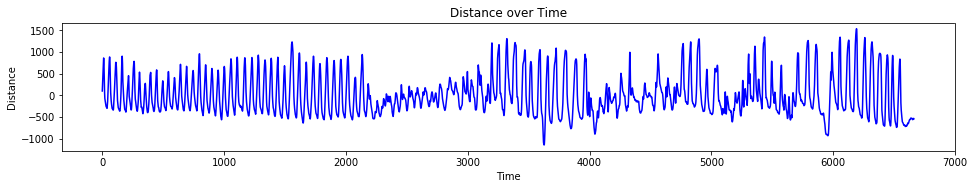

In [191]:
time = range(0, 6664)
flow = df['Flow']
pressure = df['P1']
distance = df['D1']

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,1)
plt.plot(time, flow, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,2)
plt.plot(time, pressure, 'b')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.show()

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,2)
plt.plot(time, distance, 'b')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance over Time')
plt.show()

In [ ]:
flow_class = 

fig = plt.figure(figsize = (16, 8))
plt.subplot(3,1,1)
plt.plot(time, flow_class, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

In [157]:
# Create the Feature Matrix and Scale Features
X = df.drop('Flow', axis = 1)
X.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

In [199]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = [8]),
    keras.layers.Dense(150, activation = tf.nn.relu),
    keras.layers.Dense(3, activation = tf.nn.softmax)])

In [200]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [201]:
model.fit(X_train, y_train, epochs = 500)

Epoch 1/1000
4664/4664 [==============================] - 0s 32us/sample - loss: 0.5703 - acc: 0.8298
Epoch 2/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.3353 - acc: 0.8810
Epoch 3/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.2993 - acc: 0.8881
Epoch 4/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.2835 - acc: 0.8934
Epoch 5/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.2737 - acc: 0.8988
Epoch 6/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.2668 - acc: 0.9009
Epoch 7/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.2648 - acc: 0.8984
Epoch 8/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.2594 - acc: 0.9005
Epoch 9/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.2554 - acc: 0.9024
Epoch 10/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 

4664/4664 [==============================] - 0s 19us/sample - loss: 0.1980 - acc: 0.9164
Epoch 160/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1975 - acc: 0.9172
Epoch 161/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1977 - acc: 0.9192
Epoch 162/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1988 - acc: 0.9209
Epoch 163/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1979 - acc: 0.9200
Epoch 164/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1968 - acc: 0.9194
Epoch 165/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1985 - acc: 0.9175
Epoch 166/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1961 - acc: 0.9183
Epoch 167/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1971 - acc: 0.9175
Epoch 168/1000
4664/4664 [==============================] - 0s 18us/sample - lo

4664/4664 [==============================] - 0s 18us/sample - loss: 0.1773 - acc: 0.9267
Epoch 316/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1781 - acc: 0.9275
Epoch 317/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1772 - acc: 0.9282
Epoch 318/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1780 - acc: 0.9260
Epoch 319/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1791 - acc: 0.9269
Epoch 320/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1774 - acc: 0.9282
Epoch 321/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1762 - acc: 0.9282
Epoch 322/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1772 - acc: 0.9269
Epoch 323/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1782 - acc: 0.9237
Epoch 324/1000
4664/4664 [==============================] - 0s 17us/sample - lo

4664/4664 [==============================] - 0s 18us/sample - loss: 0.1653 - acc: 0.9331
Epoch 472/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1613 - acc: 0.9333
Epoch 473/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1631 - acc: 0.9325
Epoch 474/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1637 - acc: 0.9342
Epoch 475/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1638 - acc: 0.9307
Epoch 476/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1629 - acc: 0.9327
Epoch 477/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1632 - acc: 0.9335
Epoch 478/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1630 - acc: 0.9307
Epoch 479/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1622 - acc: 0.9325
Epoch 480/1000
4664/4664 [==============================] - 0s 17us/sample - lo

4664/4664 [==============================] - 0s 19us/sample - loss: 0.1496 - acc: 0.9376
Epoch 628/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1549 - acc: 0.9383
Epoch 629/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1512 - acc: 0.9402
Epoch 630/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1531 - acc: 0.9370
Epoch 631/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1517 - acc: 0.9365
Epoch 632/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1530 - acc: 0.9350
Epoch 633/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1510 - acc: 0.9378
Epoch 634/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1491 - acc: 0.9374
Epoch 635/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1508 - acc: 0.9372
Epoch 636/1000
4664/4664 [==============================] - 0s 18us/sample - lo

4664/4664 [==============================] - 0s 18us/sample - loss: 0.1413 - acc: 0.9404
Epoch 784/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1432 - acc: 0.9408
Epoch 785/1000
4664/4664 [==============================] - 0s 17us/sample - loss: 0.1451 - acc: 0.9421
Epoch 786/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1408 - acc: 0.9436
Epoch 787/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1426 - acc: 0.9408
Epoch 788/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1433 - acc: 0.9413
Epoch 789/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1435 - acc: 0.9410
Epoch 790/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1430 - acc: 0.9417
Epoch 791/1000
4664/4664 [==============================] - 0s 18us/sample - loss: 0.1414 - acc: 0.9423
Epoch 792/1000
4664/4664 [==============================] - 0s 18us/sample - lo

4664/4664 [==============================] - 0s 19us/sample - loss: 0.1351 - acc: 0.9458
Epoch 940/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1343 - acc: 0.9451
Epoch 941/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1359 - acc: 0.9428
Epoch 942/1000
4664/4664 [==============================] - 0s 20us/sample - loss: 0.1356 - acc: 0.9443
Epoch 943/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1357 - acc: 0.9458
Epoch 944/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1337 - acc: 0.9458
Epoch 945/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1354 - acc: 0.9421
Epoch 946/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1335 - acc: 0.9468
Epoch 947/1000
4664/4664 [==============================] - 0s 19us/sample - loss: 0.1337 - acc: 0.9443
Epoch 948/1000
4664/4664 [==============================] - 0s 19us/sample - lo

In [203]:
# Scoring the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2000/2000 [==============================] - 0s 16us/sample - loss: 0.2603 - acc: 0.9025
Test accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       762
           1       0.94      0.91      0.92       706
           2       0.81      0.84      0.83       532

   micro avg       0.90      0.90      0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



In [162]:
# Import new data to test model

In [196]:
# Read in dataframe
test = pd.read_csv('test_data_2.csv')
test['Class'] = test['Flow'].apply(label_fix)

In [164]:
test.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-18.06,108.35,-145.16,84.37,-16.80,362.56,12.29,80.06,1.74,0
1,-18.06,455.13,-139.07,148.93,-15.90,354.47,8.35,73.30,1.30,0
2,-18.23,761.09,-144.06,202.42,-15.86,342.88,3.15,66.64,0.78,0
3,-18.94,1010.37,-161.04,243.71,-17.84,322.09,-3.10,59.18,0.03,0
4,-19.26,1350.27,-172.37,297.91,-19.24,313.99,-8.30,54.45,-0.74,0


In [197]:
# Create the Feature Matrix and Scale Features
X_1 = test.drop('Flow', axis = 1)
X_1.drop('Class', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

In [204]:
loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

predictions = model.predict(X_1)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_1, final_pred))

5019/5019 [==============================] - 0s 19us/sample - loss: 1.5295 - acc: 0.7946
Test accuracy: 0.7945806
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2115
           1       0.83      0.84      0.83      2005
           2       0.61      0.68      0.64       899

   micro avg       0.79      0.79      0.79      5019
   macro avg       0.76      0.77      0.77      5019
weighted avg       0.80      0.79      0.80      5019



In [209]:
keras_file = "test_file_2.h5"

In [210]:
keras.models.save_model(model, keras_file)

In [211]:
converter = tf.lite.TocoConverter.from_keras_model_file(keras_file)

In [212]:
tflite_model = converter.convert()

In [213]:
open("test_save_2.tflite", "wb").write(tflite_model)

8288

In [172]:
tf.lite.TocoConverter